## Visualizaciones de los datos

In [1]:
# Nos importamos las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import colormaps

In [2]:
# Ignoramos los warnings de hue o colores
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Código para poder visualizar todas las columnas de los df
pd.set_option('display.max_columns', None)

In [4]:
datos_completos = pd.read_csv("datos_completos.csv")
datos_completos.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Is_Active,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,True,2017,1,3,0,3,1521,152,0,0
1,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,True,2017,2,2,2,4,1320,132,0,0
2,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,True,2018,10,6,4,10,3110,311,385,31
3,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,True,2017,4,4,0,4,924,92,0,0
4,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,True,2017,5,0,0,0,0,0,0,0


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
    - Usammos un barplot donde tengamos dos barras (una por año), abajo el mes y a la izquierda el número de vuelos reservados.

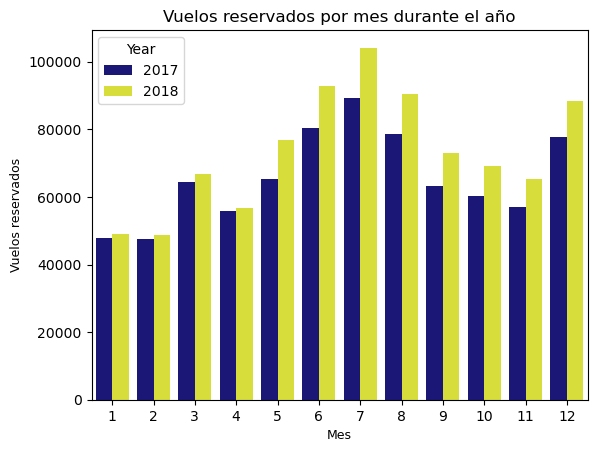

In [5]:
# Hacemos una variable nueva con groupby para sumar por mes y año.
vuelos_por_mes = datos_completos.groupby(["Year", "Month"])["Flights Booked"].sum().reset_index()

# Gráfica con datos
sns.barplot(x = "Month", 
              y = "Flights Booked",
              data = vuelos_por_mes, 
              palette = "plasma", 
              hue = "Year")
# Título de la gráfica
plt.title("Vuelos reservados por mes durante el año")
# Título de las etiquetas
plt.xlabel("Mes", fontsize = 9)
plt.ylabel("Vuelos reservados",  fontsize = 9); 


Podemos observar que en 2018 (barra amarilla) hay más reservas todos los meses y que se reservan más vuelo en los meses de verano y diciembre.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
    - Antes de crear la gráfica deberíamos pensar que sí hay relación, ya que cuanto más vuele el cliente, más puntos tendrá.
    - Son dos variables numéricas, por lo que usamos un scatterplot.

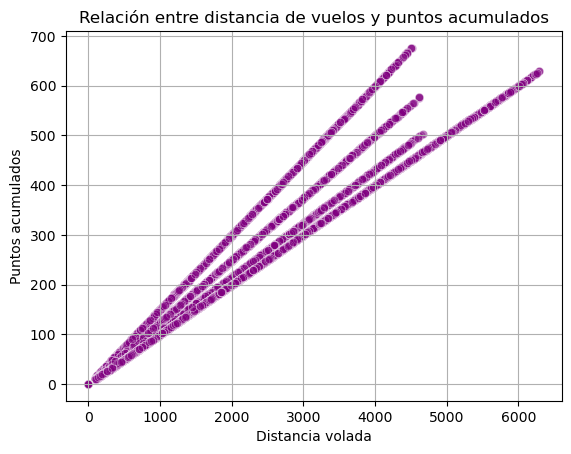

In [6]:
sns.scatterplot(data=datos_completos, x="Distance", y="Points Accumulated", color='purple', alpha=0.5)
plt.title("Relación entre distancia de vuelos y puntos acumulados")
plt.xlabel("Distancia volada")
plt.ylabel("Puntos acumulados")
plt.grid(True) # Para que haya cuadrícula en el fondo

Exacto, cuanto mayor es la distancia volada, más arriba está la gráfica: más puntos acumulados hay.

3. ¿Cuál es la distribución de los clientes por provincia o estado?
    - El país solo tiene un valor único (Canadá), por lo que vammos a ver estos datos por provincia (que solo hay 11).

Text(0, 0.5, 'Provincia')

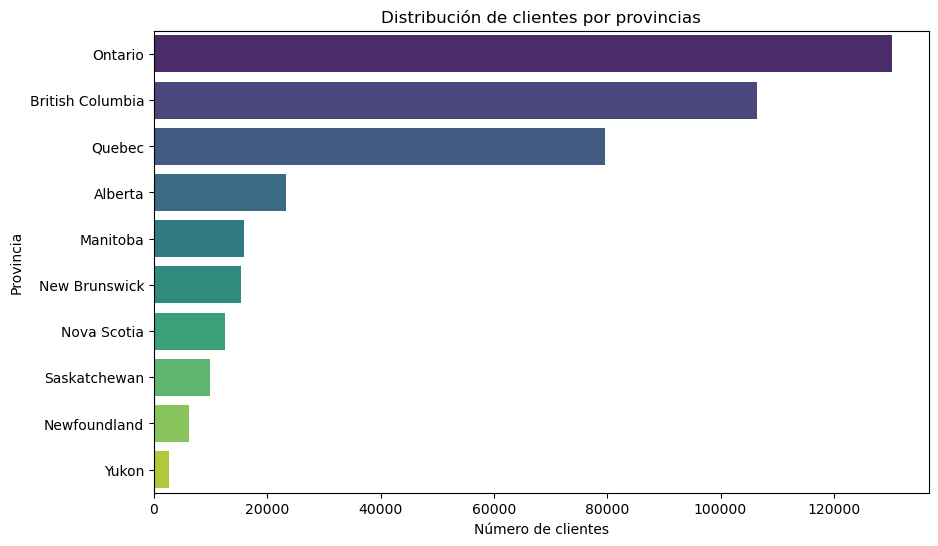

In [7]:
provincias = datos_completos["Province"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=provincias.values, y=provincias.index, palette="viridis")
plt.title("Distribución de clientes por provincias")
plt.xlabel("Número de clientes")
plt.ylabel("Provincia")

Se nota una distribución muy significativa entre las 3 primeras provincias (Ontario, British Columbia y Quebec) respecto a las demás. Podría ser porque son puntos clave del país, siendo la primera la capital.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
    - Tenemos que agrupar de nuevo por educación y salario.
    - Aquí teníamos datos Nan (todos eran de college).

Text(0, 0.5, 'Nivel educativo')

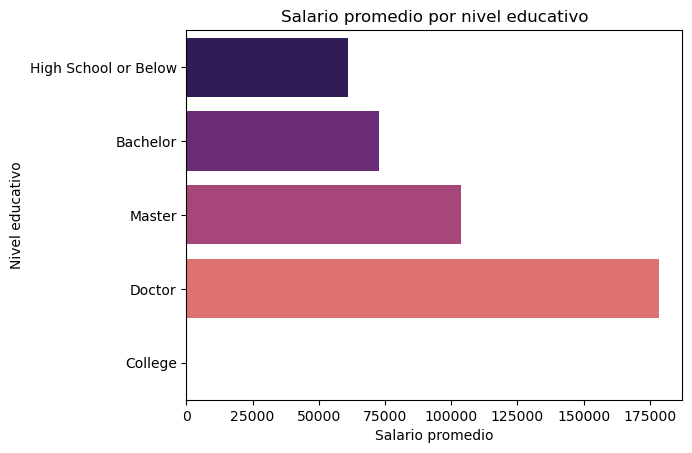

In [ ]:
# Hacemos una nueva variable para el groupby
salario_educacion = datos_completos.groupby("Education")["Salary"].mean().sort_values()

sns.barplot(x=salario_educacion.values, y=salario_educacion.index, palette="magma")
plt.title("Salario promedio por nivel educativo")
plt.xlabel("Salario promedio")
plt.ylabel("Nivel educativo")

El salario de los clientes aumenta claramente según su nivel de estudios. Tendríamos que corroborar con la empresa los nulos de college.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
    - Podemos usar un pieplot para ver el tipo de loyalty card que tienen los clientes por porcentaje.

In [11]:
# Contamos los tipos de tarjetas
tipos_tarjetas = datos_completos["Loyalty Card"].value_counts()
tipos_tarjetas

Loyalty Card
Star      183745
Nova      136883
Aurora     83132
Name: count, dtype: int64

Text(0.5, 1.0, 'Proporción de clientes por tipo de tarjeta de fidelidad')

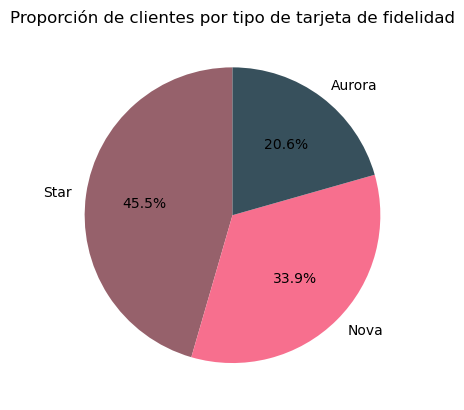

In [19]:
# Hacemos la gráfica de porcentajes
plt.pie(tipos_tarjetas.values, labels=tipos_tarjetas.index, autopct="%1.1f%%", startangle=90, colors=['#96616B','#F76F8E','#37505C'])
plt.title("Proporción de clientes por tipo de tarjeta de fidelidad")

Casi la mitad de los clientes (45.5%) tienen la tarjeta Star.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?
    - Como solo hay tres estados civiles, hacemos barras con dos colores (male y female).

Text(0, 0.5, 'Número de clientes')

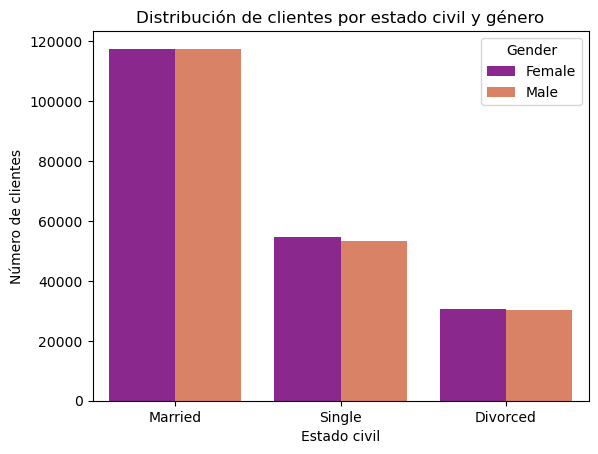

In [21]:
sns.countplot(data=datos_completos, x="Marital Status", hue="Gender", palette="plasma")
plt.title("Distribución de clientes por estado civil y género")
plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")

Se distribuyen de la misma forma prácticamente por género. Si que se observa un mayor número de clientes casados.